# **Binning**

Data binning atau sering juga disebut bucketing adalah salah satu teknik pra-pemrosesan data yang digunakan untuk meminimalisir pengaruh dari kesalahan atau noise dalam data. Cara kerjanya cukup sederhana — data yang awalnya berupa angka-angka mentah dibagi ke dalam beberapa kelompok atau interval kecil yang disebut bin. Setelah itu, nilai-nilai dalam setiap bin digantikan dengan satu nilai representatif, misalnya nilai rata-rata atau median dari bin tersebut.

# Library yang digunakan

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ambil data iris asli

Di sini saya menggunakan dataset Iris yang sudah tersedia di library sklearn.



In [ ]:
# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.to_string(index=False))

 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
               5.1               3.5                1.4               0.2
               4.9               3.0                1.4               0.2
               4.7               3.2                1.3               0.2
               4.6               3.1                1.5               0.2
               5.0               3.6                1.4               0.2
               5.4               3.9                1.7               0.4
               4.6               3.4                1.4               0.3
               5.0               3.4                1.5               0.2
               4.4               2.9                1.4               0.2
               4.9               3.1                1.5               0.1
               5.4               3.7                1.5               0.2
               4.8               3.4                1.6               0.2
               4.8               3.0  

# Klasifikasi Naive Bayes pada Data Iris asli

Di bagian ini, saya menerapkan algoritma Naive Bayes untuk melakukan klasifikasi pada data Iris asli., untuk mencari akurasi data iris



Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



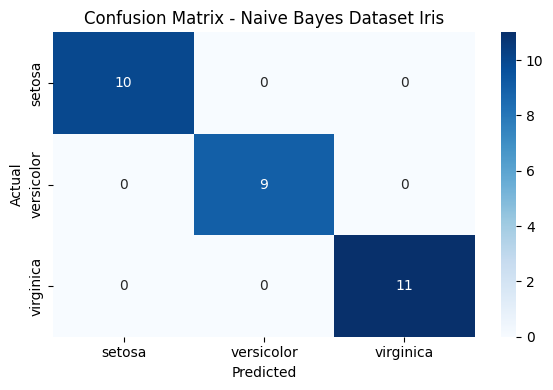

In [ ]:
# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Dataset Iris')
plt.tight_layout()
plt.show()

# Klasifikasi Decision Tree pada Data Iris asli

Pada bagian ini, saya menggunakan algoritma Decision Tree untuk melakukan klasifikasi terhadap data Iris asli. untuk mencari akurasi data iris



Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



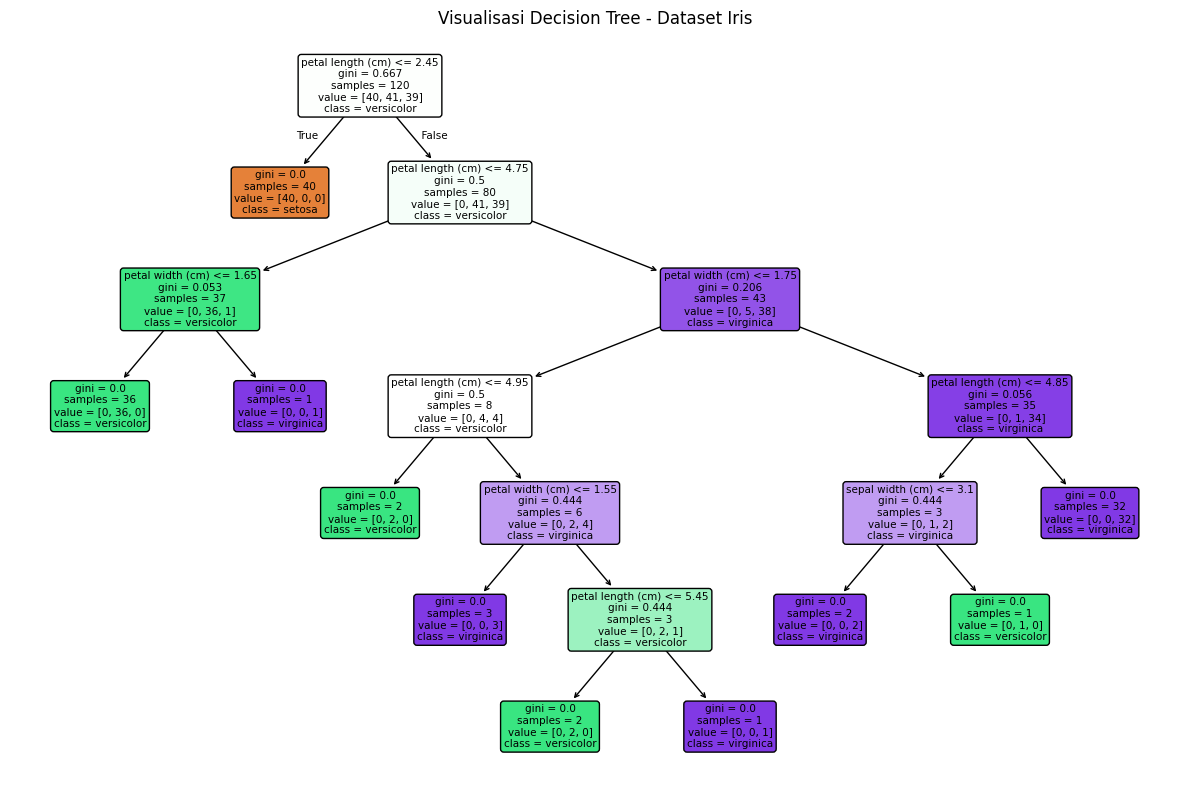

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=target_names))

plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree - Dataset Iris")
plt.tight_layout()
plt.show()

# Diskritisasi Dataset Iris

# Diskritisasi Dataset Iris menggunakan K-Means

# Penjelasan Konsep Diskritisasi menggunakan K-means

Dalam pengolahan data, salah satu cara untuk melakukan diskritisasi yang cukup fleksibel dan pintar adalah dengan menggunakan metode K-Means. Metode ini berasal dari pendekatan unsupervised learning, yang artinya algoritma ini belajar sendiri dari data numerik tanpa perlu label. Tujuannya adalah membagi data ke dalam beberapa kelompok atau cluster, di mana setiap cluster berisi nilai-nilai yang mirip berdasarkan jarak angka antar nilainya.

Langkah awalnya adalah menentukan dulu mau dibagi ke berapa cluster, misalnya 3. Lalu algoritma K-Means akan memilih titik pusat awal (disebut centroid) secara acak. Setelah itu, semua data diukur jaraknya ke setiap centroid, dan tiap data dimasukkan ke cluster yang jaraknya paling dekat. Setelah semua data dikelompokkan, posisi centroid akan diperbarui berdasarkan rata-rata nilai dalam cluster tersebut. Proses ini terus diulang sampai hasilnya nggak banyak berubah lagi — artinya sudah stabil.

Yang menarik dari metode ini adalah kemampuannya menyesuaikan diri dengan pola alami dalam data. Berbeda dengan metode diskritisasi biasa yang membagi data berdasarkan rentang angka tetap (misalnya setiap 10 angka satu kelompok), K-Means bisa membentuk kelompok yang lebih “pas” dengan kondisi nyata dari data. Jadi kalau sebaran datanya nggak merata atau punya kecenderungan membentuk kelompok-kelompok, K-Means bisa memberikan hasil yang lebih masuk akal.

Tapi, metode ini juga punya tantangan. Misalnya, prosesnya lebih rumit karena melibatkan perhitungan berulang dan cukup sensitif terhadap pemilihan titik awal centroid. Selain itu, kita juga harus menentukan jumlah cluster dari awal, dan kadang perlu coba-coba dulu untuk menemukan jumlah yang paling optimal. Meski begitu, K-Means Discretization tetap jadi salah satu pilihan terbaik kalau kita butuh hasil pengelompokan data yang akurat dan sesuai dengan struktur datanya.

In [ ]:
# Mapping angka cluster ke huruf
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Fungsi clustering per kolom
def cluster_column(column):
    values = df[[column]]
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(values)
    return pd.Series(clusters).map(label_map)

# Buat DataFrame hanya berisi hasil clustering
df_kmeans = pd.DataFrame({
    'sepal_length': cluster_column('sepal length (cm)'),
    'sepal_width':  cluster_column('sepal width (cm)'),
    'petal_length': cluster_column('petal length (cm)'),
    'petal_width':  cluster_column('petal width (cm)')
})

# Tambahkan kolom class_label di bagian depan
df_kmeans.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil klaster
print(df_kmeans.to_string(index=False))

     class sepal_length sepal_width petal_length petal_width
    setosa            C           D            B           B
    setosa            C           C            B           B
    setosa            C           A            B           B
    setosa            C           A            B           B
    setosa            C           D            B           B
    setosa            B           D            B           B
    setosa            C           A            B           B
    setosa            C           A            B           B
    setosa            C           C            B           B
    setosa            C           A            B           B
    setosa            B           D            B           B
    setosa            C           A            B           B
    setosa            C           C            B           B
    setosa            C           C            B           B
    setosa            B           D            B           B
    setosa            B 

# Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan K-Means

Disini saya melakukan klasifikasi Naive Bayes pada data iris hasil diskritisasi menggunakan K-Means, untuk mencari akurasi data iris



In [ ]:
le = LabelEncoder()
X = df_kmeans.drop(columns='class').apply(le.fit_transform)
y = df_kmeans['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.67      0.80         9
   virginica       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



# Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan K-Means

Di bagian ini, saya menggunakan algoritma Decision Tree untuk melakukan klasifikasi pada data Iris yang sudah melalui proses diskritisasi menggunakan K-Means untuk mencari akurasi data iris



Akurasi: 0.9

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



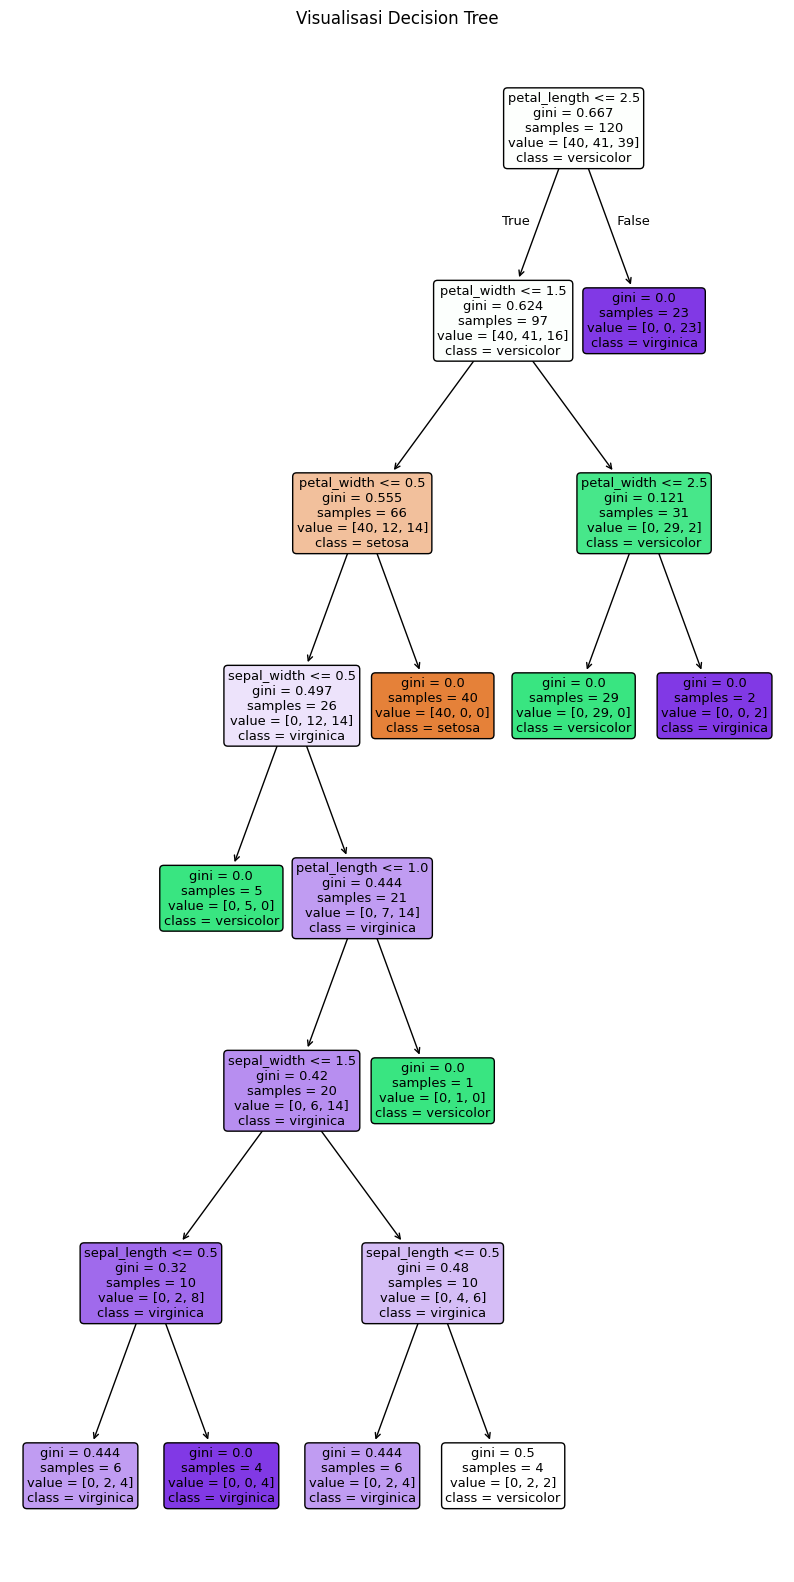

In [ ]:
le = LabelEncoder()
X = df_kmeans.drop(columns='class').apply(le.fit_transform)

y = df_kmeans['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()

In [ ]:
# Simpan ke file CSV
df_kmeans.to_csv('diskritisasi_iris_kmeans.csv', index=False)

# Diskritisasi Dataset Iris menggunakan Equal-Width Binning

## Penjelasan Konsep Diskritisasi menggunakan Equal Width Binning

Berbeda dengan metode K-Means yang mengikuti pola sebaran data, Equal-Width Binning menggunakan pendekatan yang lebih sederhana dan langsung. Dalam metode ini, kita cukup membagi rentang nilai dari data numerik ke dalam beberapa interval (bin) yang memiliki lebar sama.

Langkah pertama yang dilakukan adalah mencari nilai minimum dan maksimum dari data. Selanjutnya, kita hitung selisih antara keduanya, lalu dibagi dengan jumlah bin yang diinginkan untuk mendapatkan lebar setiap bin. Misalnya, kalau data memiliki nilai minimum 12 dan maksimum 40, dan kita ingin membaginya ke dalam 3 bin, maka lebar tiap bin adalah (40 - 12) / 3 = 9.33. Artinya:

Bin pertama mencakup nilai dari 12 sampai sekitar 21.33,

Bin kedua dari 21.33 sampai 30.66,

Bin ketiga dari 30.66 sampai 40.

Setelah intervalnya dibuat, tiap data akan dimasukkan ke bin yang sesuai. Untuk memudahkan analisis atau klasifikasi, masing-masing bin bisa diberi label, misalnya “Rendah”, “Sedang”, dan “Tinggi”.

In [ ]:
# Fungsi diskritisasi equal-width
def equiwidth_discretize(arr, m):
    min_val = arr.min()
    max_val = arr.max()
    width = (max_val - min_val) / m

    # Buat batas-batas bin
    bin_edges = [min_val + i * width for i in range(m + 1)]

    # Diskritisasi: untuk setiap nilai, cari bin index
    bin_indices = np.digitize(arr, bins=bin_edges[1:-1], right=True)
    return pd.Series(bin_indices).map(label_map)

# Buat DataFrame hasil diskritisasi
df_equal_width = pd.DataFrame({
    'sepal_length': equiwidth_discretize(df['sepal length (cm)'], 4),
    'sepal_width':  equiwidth_discretize(df['sepal width (cm)'], 4),
    'petal_length': equiwidth_discretize(df['petal length (cm)'], 4),
    'petal_width':  equiwidth_discretize(df['petal width (cm)'], 4)
})

# Tambahkan label kelas di depan
df_equal_width.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil
print(df_equal_width.to_string(index=False))

     class sepal_length sepal_width petal_length petal_width
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            A           C            A           A
    setosa            B           D            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            B           C            A           A
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            B           D            A           A
    setosa            B 

In [ ]:
# Simpan ke file CSV
df_equal_width.to_csv('diskritisasi_iris_equalwidth.csv', index=False)

# Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan Equal-Width
Di bagian ini, saya menerapkan algoritma Naive Bayes untuk melakukan klasifikasi pada data Iris yang sebelumnya telah didiskritisasi menggunakan metode Equal-Width Binning untuk mencari akurasi data iris

In [ ]:
le = LabelEncoder()
X = df_equal_width.drop(columns='class').apply(le.fit_transform)

y = df_equal_width['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CategoricalNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9333333333333333

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan Equal-Width Binning

Di tahap ini, saya menggunakan algoritma Decision Tree untuk melakukan klasifikasi pada data Iris yang sudah didiskritisasi dengan metode Equal-Width Binning.untuk mencari akurasi data iris

Akurasi: 0.9666666666666667

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



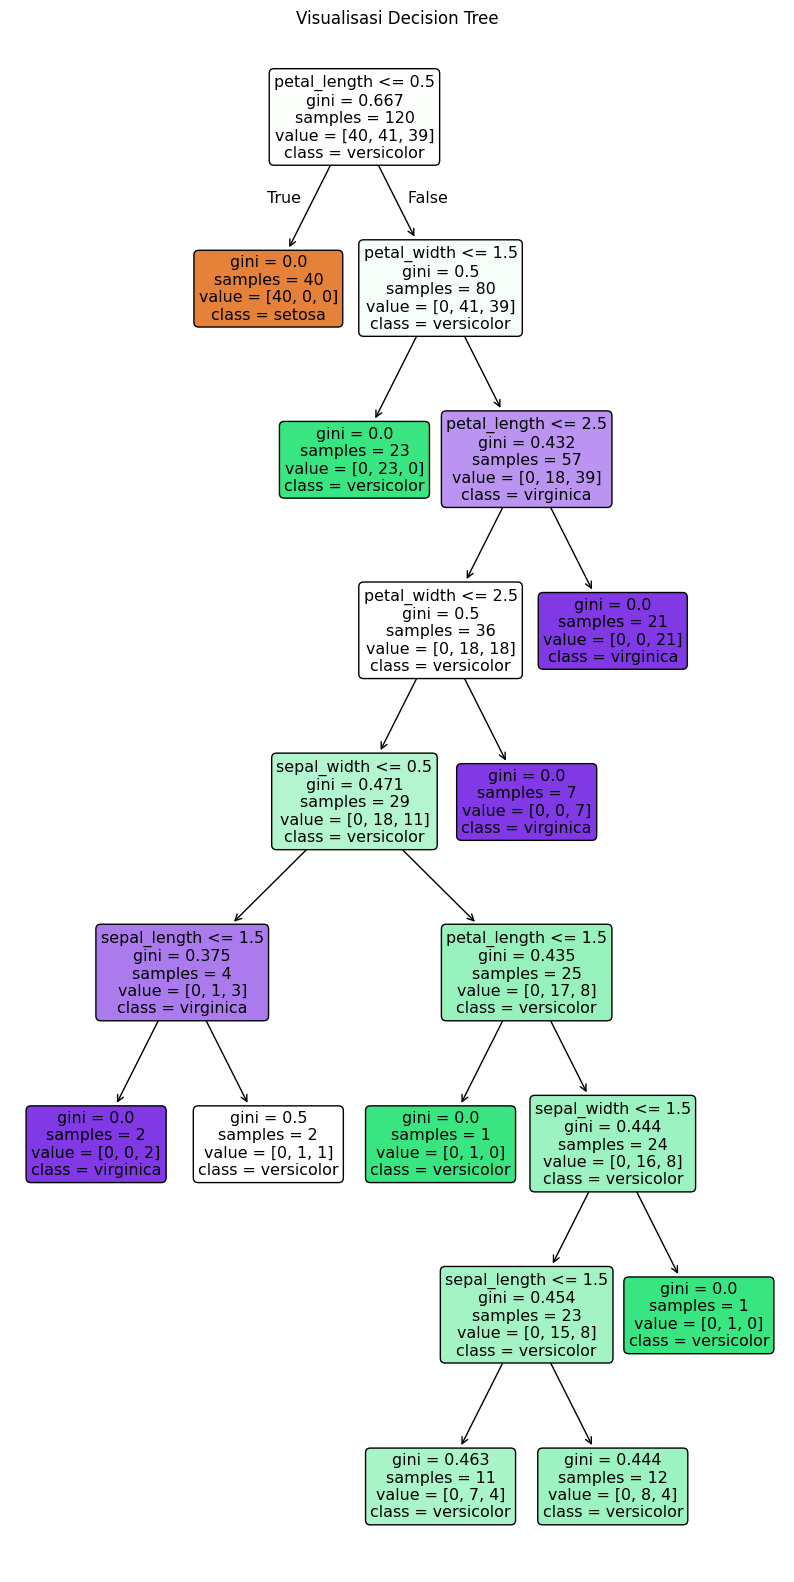

In [ ]:
le = LabelEncoder()
X = df_equal_width.drop(columns='class').apply(le.fit_transform)

y = df_equal_width['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()

# Diskritisasi Dataset Iris menggunakan Equal-Frequency Binning

# Penjelasan Konsep Diskritisasi menggunakan Equal-Frequency Binning

Metode diskritisasi lain yang juga cukup sering digunakan adalah Equal-Frequency Binning, atau dikenal juga sebagai quantile-based discretization. Berbeda dari metode Equal-Width yang membagi data berdasarkan lebar interval yang sama, Equal-Frequency lebih fokus pada jumlah data dalam setiap kelompok (bin).

Cara kerjanya cukup sederhana. Pertama, data diurutkan dari nilai terkecil ke yang terbesar. Setelah itu, data dibagi ke dalam beberapa bin, di mana masing-masing bin berisi jumlah data yang kurang lebih sama. Misalnya, kalau kita ingin membaginya menjadi 4 bin, maka setiap bin akan berisi sekitar 25% dari total data. Batas antar bin biasanya ditentukan menggunakan kuantil, seperti Q1 (25%), Q2 (median), dan Q3 (75%).

Kelebihan utama dari metode ini adalah kemampuannya untuk menjaga keseimbangan jumlah data di setiap bin. Ini penting dalam pelatihan model machine learning supaya model tidak terlalu fokus pada kelompok tertentu saja. Kalau ada bin yang isinya terlalu sedikit, bisa saja model jadi mengabaikannya, dan ini tentu bisa berdampak pada hasil prediksi.

In [ ]:
# Fungsi manual untuk equal-frequency discretization
def discretize_cdf(data, m):
    data = list(data)
    data_sorted = sorted(data)
    n = len(data_sorted)
    thresholds = [-float('inf')]

    # Hitung batas kuantil
    for k in range(1, m):
        q = k / m
        index = (n - 1) * q
        floor = int(index)
        ceil = floor + 1
        frac = index - floor
        if ceil >= n:
            val = data_sorted[floor]
        else:
            val = data_sorted[floor] + (data_sorted[ceil] - data_sorted[floor]) * frac
        thresholds.append(val)

    thresholds.append(float('inf'))

    # Tentukan label bin untuk setiap nilai
    labels = []
    for value in data:
        for b in range(1, len(thresholds)):
            if thresholds[b - 1] <= value < thresholds[b]:
                labels.append(label_map[b - 1])
                break

    return labels

# Terapkan discretization ke setiap kolom
df_equal_frequency = pd.DataFrame({
    'sepal_length': discretize_cdf(df['sepal length (cm)'], 4),
    'sepal_width':  discretize_cdf(df['sepal width (cm)'], 4),
    'petal_length': discretize_cdf(df['petal length (cm)'], 4),
    'petal_width':  discretize_cdf(df['petal width (cm)'], 4)
})

# Tambahkan kolom kelas di depan
df_equal_frequency.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil
print(df_equal_frequency.to_string(index=False))

     class sepal_length sepal_width petal_length petal_width
    setosa            B           D            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           D            A           A
    setosa            B           D            B           B
    setosa            A           D            A           B
    setosa            A           D            A           A
    setosa            A           B            A           A
    setosa            A           C            A           A
    setosa            B           D            A           A
    setosa            A           D            B           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            C           D            A           A
    setosa            B 

In [ ]:
df_equal_frequency.to_csv('diskritisasi_iris_equalfrequency.csv', index=False)

# Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan Equal-Frequency

Pada bagian ini, saya menggunakan algoritma Naive Bayes untuk melakukan klasifikasi pada data Iris yang sebelumnya sudah diproses dengan metode Equal-Frequency Binning untuk mencari akurasi data iris

In [ ]:
le = LabelEncoder()
X = df_equal_frequency.drop(columns='class').apply(le.fit_transform)

y = df_equal_frequency['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CategoricalNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan Equal-Frequency

Di tahap ini, saya menerapkan algoritma Decision Tree untuk melakukan klasifikasi pada data Iris yang telah didiskritisasi menggunakan metode Equal-Frequency Binning untuk mencari akurasi data iris

Akurasi: 0.9666666666666667

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



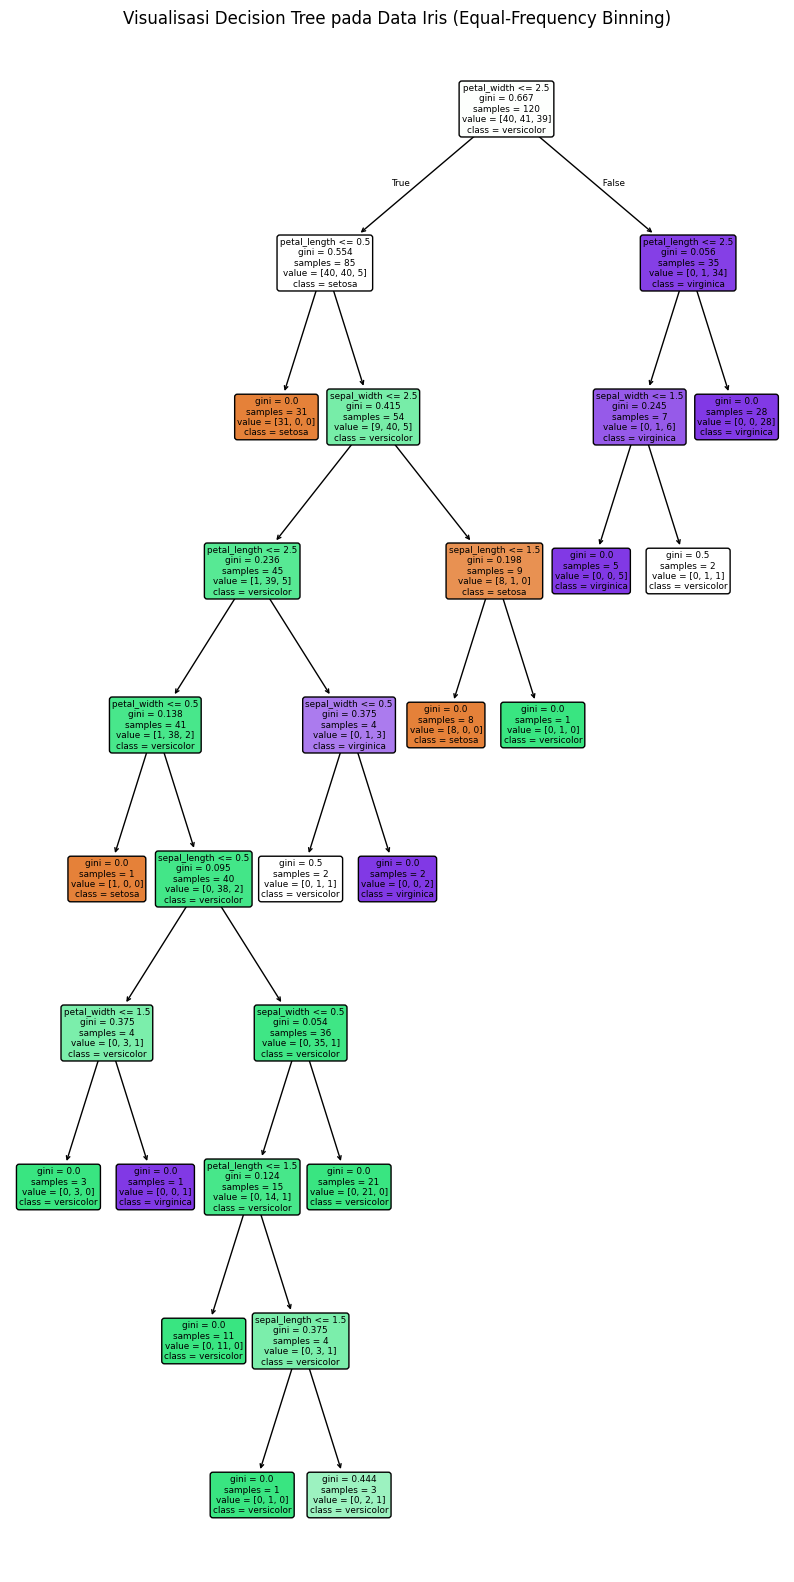

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


le = LabelEncoder()
X = df_equal_frequency.drop(columns='class').apply(le.fit_transform)

y = df_equal_frequency['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree pada Data Iris (Equal-Frequency Binning)")
plt.show()

# Perbandingan Akurasi
Data iris asli

Naive Bayes = 100 %

Decision Tree = 100 %

Data iris hasil diskritisasi menggunakan Kmeans

Naive Bayes = 90 %

Decision Tree = 90 %

Data iris hasil diskritisasi menggunakan Equal-Width Binning

Naive Bayes = 93,33 %

Decision Tree = 96,67 %

Data iris hasil diskritisasi menggunakan Equal-Frequency Binning

Naive Bayes = 100 %

Decision Tree = 96,67 %